In [ ]:
# Page 141 of Python for Algorithmic Trading from idea to cloud deployment 
# Machine Learning
# Classification

# Logistic Regression in Genral Problem for predicting PASS/ FAIL w.r.t number of hours studied 

In [1]:
import random 
import numpy as np 
from pylab import mpl, plt 

plt.style.use('seaborn') 
mpl.rcParams['savefig.dpi'] = 300 
mpl.rcParams['font.family'] = 'serif' 


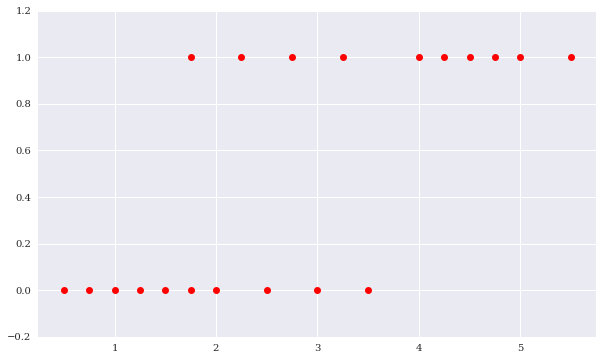

In [3]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 1.75, 2., 2.25, 2.5, 2.75, 3., 3.25, 3.5, 4., 4.25, 4.5, 4.75, 5., 5.5])
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
plt.figure(figsize=(10, 6)) 
plt.plot(hours, success, 'ro')
plt.ylim(-0.2, 1.2);
 

# Trying Linear Regression to approach the above problem
#  It literally is awful fit

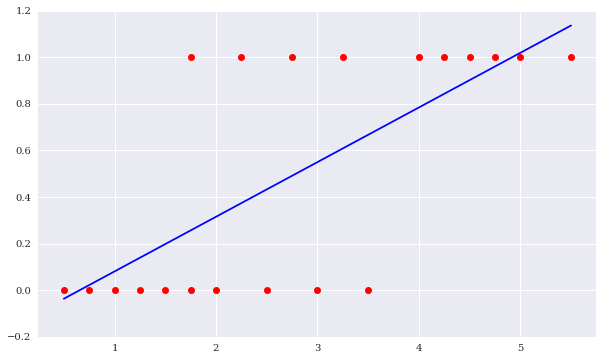

In [10]:
reg = np.polyfit(hours, success, deg=1)

plt.figure(figsize=(10, 6)) 
plt.plot(hours, success, 'ro') 
plt.plot(hours, np.polyval(reg, hours), 'b')
plt.ylim(-0.2, 1.2);


# We now try solving through Logistic Regreession as under  {But in Linear Model}
# This model tells us not surely that if student studies 3 or 3.5 hours, whether he will pass or fail.

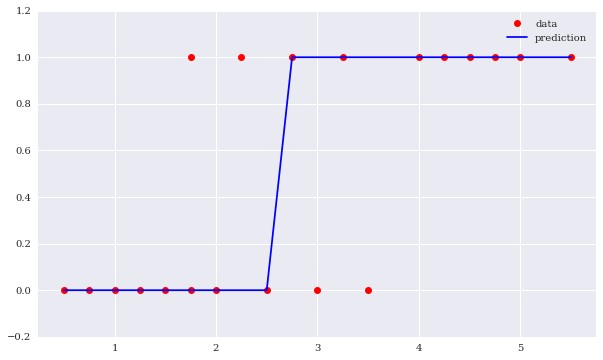

In [11]:
from sklearn import linear_model

lm = linear_model.LogisticRegression(solver='lbfgs')
hrs = hours.reshape(1, -1).T   # Reshape from 1D to 2D is required by Scikitlearn
lm.fit(hrs, success)
prediction = lm.predict(hrs)

plt.figure(figsize=(10, 6))
plt.plot(hours, success, 'ro', label='data')
plt.plot(hours, prediction, 'b', label='prediction')
plt.legend(loc=0) 
plt.ylim(-0.2, 1.2);



# To overcome the shortcoming of the above model, we need to
#  add probablity curve to make it more meaningful

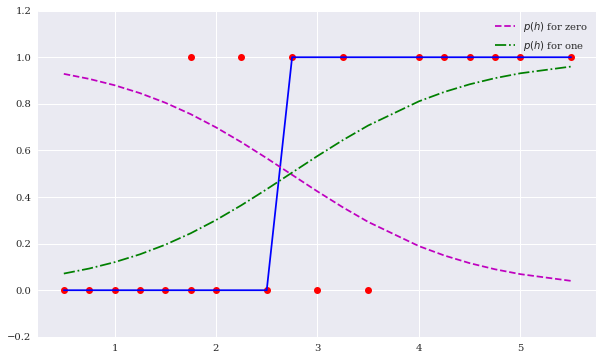

In [14]:
prob = lm.predict_proba(hrs)

plt.figure(figsize=(10, 6)) 
plt.plot(hours, success, 'ro')
plt.plot(hours, prediction, 'b') 
plt.plot(hours, prob.T[0], 'm--', label='$p(h)$ for zero')
plt.plot(hours, prob.T[1], 'g-.', label='$p(h)$ for one')
plt.ylim(-0.2, 1.2)
plt.legend(loc=0);
#print(prob)